### Run a Hyperopt experiment to find some good hyperparameters

In [39]:
# import git
import json
import numpy as np
from collections import namedtuple
from hyperopt import fmin, tpe, hp
from hyperopt.mongoexp import MongoTrials, MongoJobs
from matplotlib import pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from ddpg_agent.UdacityQuadcopterEvaluator import evaluator, UdacityDDPGLearningParams

learning_params = UdacityDDPGLearningParams(
    exploration_mu=0, 
    exploration_theta=hp.uniform('theta',0,1), 
    exploration_sigma=hp.uniform('sigma',.1,10), 
    n_episodes=1000, n_training_courses=3,
    gamma=hp.choice('gamma',[.5, .7, .99]), 
    buffer_size=100000, 
    batch_size=hp.choice('batch_size',[64,256,1024]),
    tau=hp.uniform('tau',.01,.9),
)

# commit_sha = git.Repo().head.commit.hexsha[:8]
# print("Running experiment quadcopter_learning_%s"%commit_sha)
# learning_trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key='quadcopter_learning_%s'%commit_sha)

exp_name = "quadcopter_udacity_model_exp_%03i"%6
print("Running experiment %s"%exp_name)
learning_trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key=exp_name)
best_learning_params = fmin(evaluator, learning_params, trials=learning_trials, algo=tpe.suggest, max_evals=330)
print(best_learning_params)

Running experiment quadcopter_udacity_model_exp_006


over-writing old domain trials attachment


0it [00:00, ?it/s, best loss: ?]
{'batch_size': 0, 'gamma': 0, 'sigma': 0.11892177338431287, 'tau': 0.8667134191513675, 'theta': 0.11524393810716053}


### Show how the score varies with different noise parameters

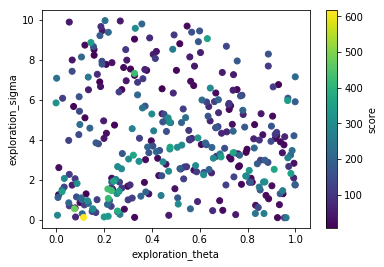

In [44]:
completed_trials = [dict(t['result']) for t in learning_trials.trials if t['result']['status']=='ok']
completed_trials.sort(key=lambda x: -x['loss']) # reverse order so the high scores end up plotted on top

x_dim='exploration_theta'
y_dim='exploration_sigma'
plt.scatter([t['params'][x_dim] for t in completed_trials], 
            [t['params'][y_dim] for t in completed_trials],
             c=[-t['loss'] for t in completed_trials],)
plt.xlabel(x_dim)
plt.ylabel(y_dim)
plt.colorbar(label='score');

### Show the top 20 training courses

{'n_training_courses': 3, 'n_episodes': 1000, 'exploration_mu': 0, 'exploration_theta': 0.11524393810716053, 'exploration_sigma': 0.11892177338431287, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.5, 'tau': 0.8667134191513675}
-616.6606044306243


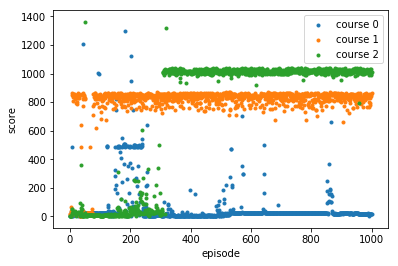

{'n_training_courses': 3, 'n_episodes': 1000, 'exploration_mu': 0, 'exploration_theta': 0.07733794259621674, 'exploration_sigma': 0.5536212212448497, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.5, 'tau': 0.8550605258817597}
-478.15029471790103


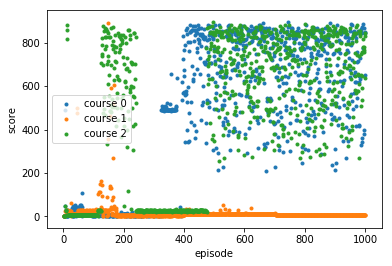

{'n_training_courses': 3, 'n_episodes': 1000, 'exploration_mu': 0, 'exploration_theta': 0.21676160214292184, 'exploration_sigma': 1.541007506032956, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.5, 'tau': 0.7020466886083939}
-430.81647991393356


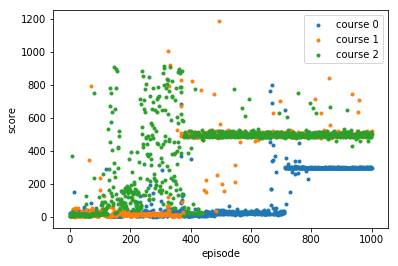

{'n_training_courses': 3, 'n_episodes': 500, 'exploration_mu': 0, 'exploration_theta': 0.32819981629728306, 'exploration_sigma': 7.32334627072239, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.99, 'tau': 0.7349288550099465}
-427.71082136968806


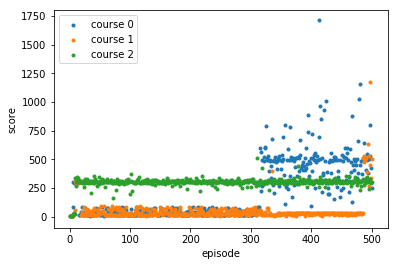

{'n_training_courses': 3, 'n_episodes': 500, 'exploration_mu': 0, 'exploration_theta': 0.23143687110837752, 'exploration_sigma': 1.4644673342449805, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.99, 'tau': 0.36383451472879497}
-427.5242326024274


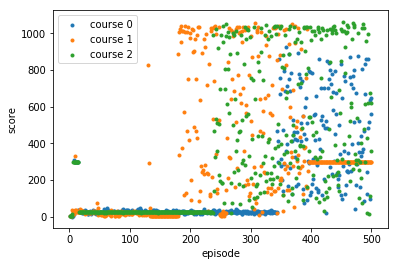

{'n_training_courses': 3, 'n_episodes': 1000, 'exploration_mu': 0, 'exploration_theta': 0.2184792459299013, 'exploration_sigma': 1.0664122377724936, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.5, 'tau': 0.8290475078550386}
-414.7833450719333


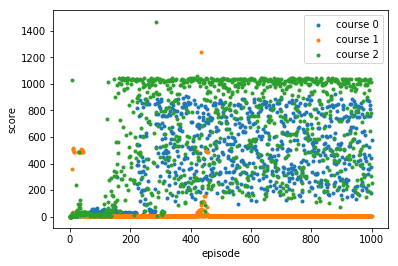

{'n_training_courses': 3, 'n_episodes': 1000, 'exploration_mu': 0, 'exploration_theta': 0.25706594949534395, 'exploration_sigma': 0.43527526376465264, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.99, 'tau': 0.6649255261420064}
-383.9188377552464


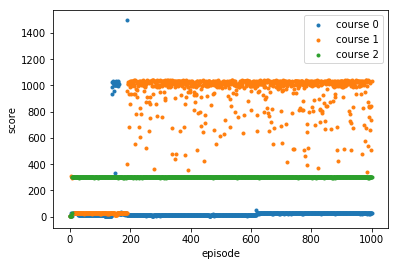

{'n_training_courses': 3, 'n_episodes': 500, 'exploration_mu': 0, 'exploration_theta': 0.7399899063166423, 'exploration_sigma': 3.356514877969064, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.5, 'tau': 0.6039783934078814}
-370.0712124269847


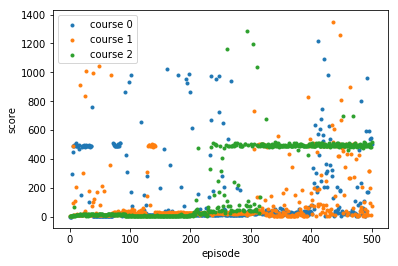

{'n_training_courses': 3, 'n_episodes': 1000, 'exploration_mu': 0, 'exploration_theta': 0.24079888302923255, 'exploration_sigma': 1.9279099450943598, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.99, 'tau': 0.608422246350808}
-367.6996292564454


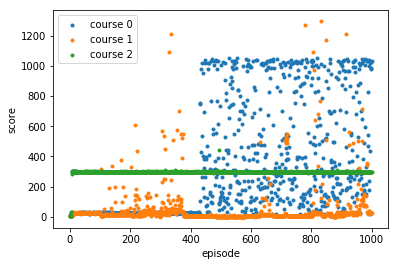

{'n_training_courses': 3, 'n_episodes': 500, 'exploration_mu': 0, 'exploration_theta': 0.9111776292257141, 'exploration_sigma': 2.523079580436645, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.5, 'tau': 0.5038019530176826}
-366.36776043513356


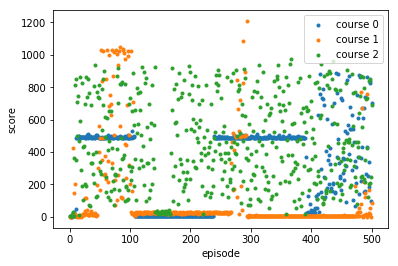

{'n_training_courses': 3, 'n_episodes': 1000, 'exploration_mu': 0, 'exploration_theta': 0.32309532711243183, 'exploration_sigma': 3.231246055573066, 'buffer_size': 100000, 'batch_size': 256, 'gamma': 0.99, 'tau': 0.34579319906990524}
-366.2405377523173


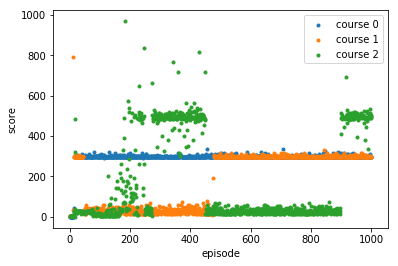

{'n_training_courses': 3, 'n_episodes': 500, 'exploration_mu': 0, 'exploration_theta': 0.47651467575784967, 'exploration_sigma': 3.6310787320542226, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.99, 'tau': 0.5405790056433236}
-360.23546994682016


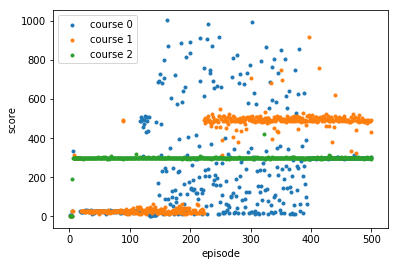

{'n_training_courses': 3, 'n_episodes': 500, 'exploration_mu': 0, 'exploration_theta': 0.9809823780267195, 'exploration_sigma': 2.315578953434755, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.5, 'tau': 0.45699486534634626}
-353.60908876884145


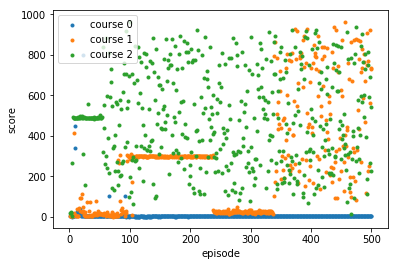

{'n_training_courses': 3, 'n_episodes': 500, 'exploration_mu': 0, 'exploration_theta': 0.6320447831887515, 'exploration_sigma': 9.060517709110654, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.99, 'tau': 0.734537261267636}
-349.9047021377193


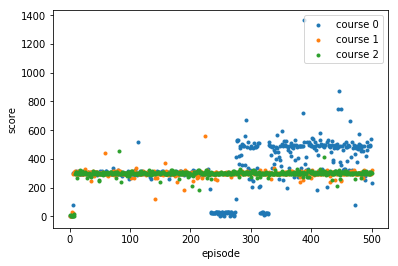

{'n_training_courses': 3, 'n_episodes': 1000, 'exploration_mu': 0, 'exploration_theta': 0.02499398571555375, 'exploration_sigma': 1.3984125798393514, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.5, 'tau': 0.8396470031847706}
-347.42432430644664


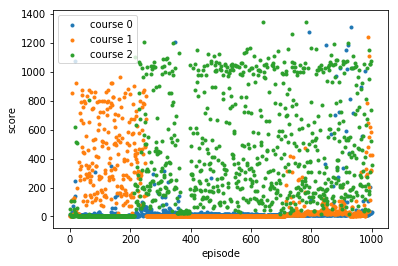

{'n_training_courses': 3, 'n_episodes': 500, 'exploration_mu': 0, 'exploration_theta': 0.6892397824480208, 'exploration_sigma': 3.1438528000226773, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.5, 'tau': 0.4845062800629633}
-347.0621651330987


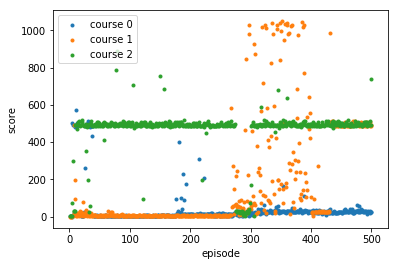

{'n_training_courses': 3, 'n_episodes': 1000, 'exploration_mu': 0, 'exploration_theta': 0.263304408711928, 'exploration_sigma': 1.4240820914244752, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.5, 'tau': 0.42122390582490965}
-346.8800682740596


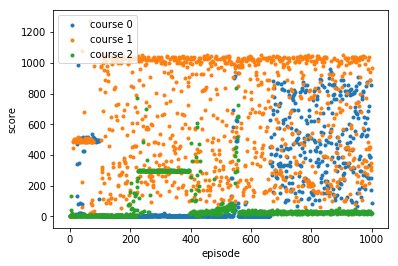

{'n_training_courses': 3, 'n_episodes': 500, 'exploration_mu': 0, 'exploration_theta': 0.9674123923731615, 'exploration_sigma': 5.962332133553458, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.7, 'tau': 0.5769501947319519}
-344.7609169712634


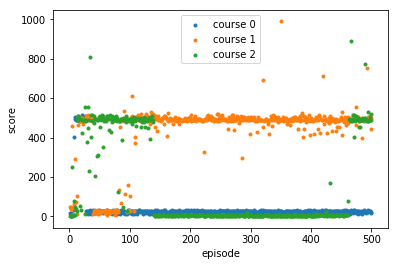

{'n_training_courses': 3, 'n_episodes': 1000, 'exploration_mu': 0, 'exploration_theta': 0.1457302774261326, 'exploration_sigma': 8.865406525639962, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.5, 'tau': 0.884230832949327}
-342.21149476379287


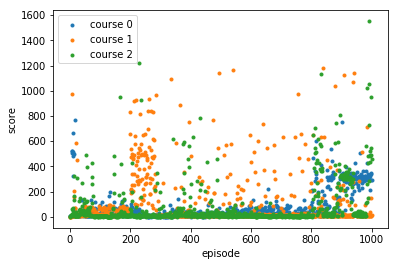

{'n_training_courses': 3, 'n_episodes': 1000, 'exploration_mu': 0, 'exploration_theta': 0.2012325173334077, 'exploration_sigma': 0.14210602464483157, 'buffer_size': 100000, 'batch_size': 1024, 'gamma': 0.7, 'tau': 0.6471120384502672}
-336.7678460139569


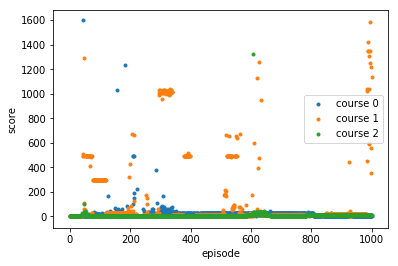

In [40]:
for trial in completed_trials[:20]:
    print(dict(trial['params']))
    print(trial['loss'])
    for i, scores in enumerate(trial['learning_curves']):
        plt.scatter(range(1,len(scores)+1), scores, label="course %i"%i,marker='.')
        plt.legend()
        plt.xlabel("episode")
        plt.ylabel("score")
    plt.show()